### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [4]:
data = pd.read_csv('data/coupons.csv')

In [8]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [26]:
# here we are finding what percentage of data is missing in each column.
# data.isnull() gives us the missing values in each column, .sum() gives us the count of True values, then dividing by length of data will
# give us the percentage.
missing_data = (data.isnull().sum()/len(data))*100
missing_data[missing_data>0]

car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
dtype: float64

3. Decide what to do about your missing data -- drop, replace, other...

In [101]:
# first since we see that 99% of the data is missing in car column, it is better to just go ahead and drop this column.
# then for the other columns, we can take the mode and replace the values with mode since there are non numeric values.
# finally checking if all the null values are removed and we have a clean data.
final_dataset = data.drop(columns=['car'])
columns_to_replace = ['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']
for col in columns_to_replace:
    mode=final_dataset[col].mode()[0]
    final_dataset[col] = final_dataset[col].fillna(mode)
final_dataset[columns_to_replace].isnull().sum()


Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
dtype: int64

4. What proportion of the total observations chose to accept the coupon?



In [103]:
# calculate the total number fo observations in data.
total_observations = len(final_dataset)
print("total number of values: ",total_observations)

# total number of people wwho accepted the coupons.
total_observations_accepted_coupons = final_dataset[final_dataset['Y']==1].shape[0]
print("total number of people who accepted coupons: ",total_observations_accepted_coupons)

#proportion accepted:
proportion_accepted = (total_observations_accepted_coupons/total_observations)*100
print("proportion accepted: ",proportion_accepted, "%")


total number of values:  12684
total number of people who accepted coupons:  7210
proportion accepted:  56.84326710816777 %


5. Use a bar plot to visualize the `coupon` column.

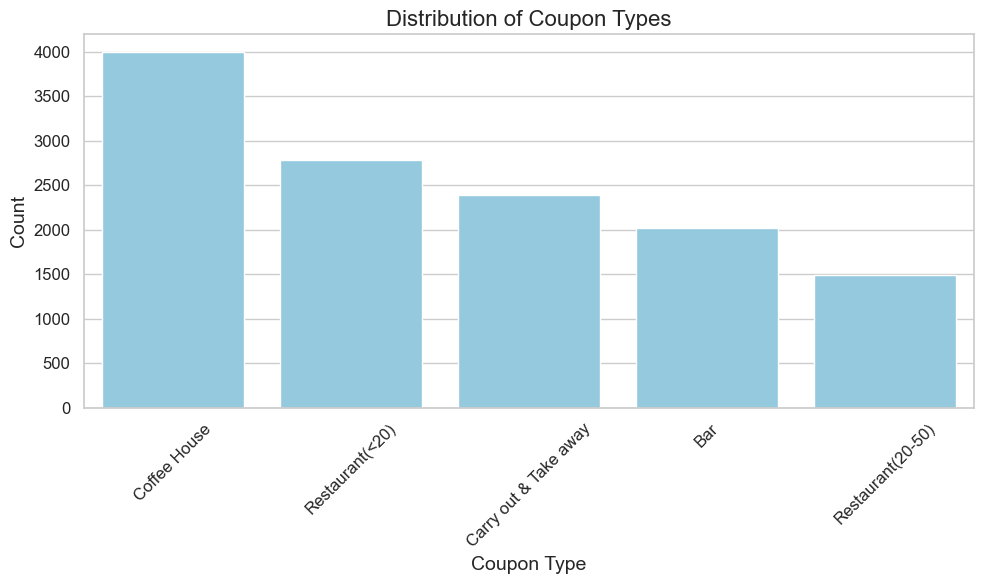

In [156]:
#counting the occurences of coupons.
coupons = final_dataset['coupon'].value_counts()

#setting seaborn style
sns.set(style='whitegrid')

#creating plot.
plt.figure(figsize=(10,6))
sns.barplot(x=coupons.index, y=coupons.values, color = 'skyblue')

# Add labels and title
plt.title('Distribution of Coupon Types', fontsize=16)
plt.xlabel('Coupon Type', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

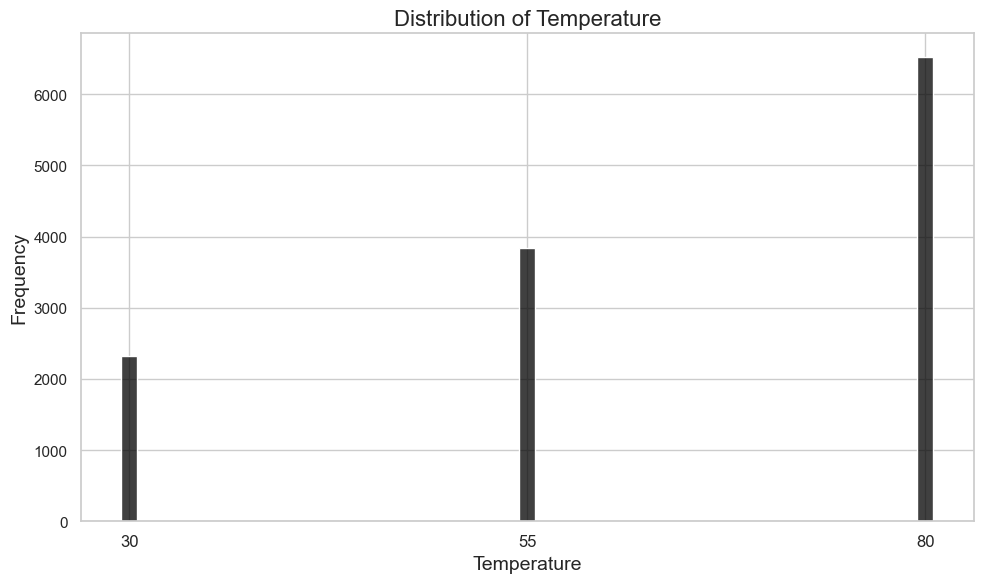

In [203]:
# checking the unique values for the temprature column first.
# temp = final_dataset['temperature'].value_counts()
# print(temp)

# Set a Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Create the histogram
plt.figure(figsize=(10, 6))  # Set figure size
sns.histplot(data['temperature'], bins=len(final_dataset['temperature'].unique()), discrete=True, color='black')

# Add labels and title
plt.title('Distribution of Temperature', fontsize=16)
plt.xlabel('Temperature', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Removing the other values.
plt.xticks(data['temperature'].unique(), fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [211]:
# filtering the coupons with 'Bar'
bar_dataFrame =  final_dataset[final_dataset['coupon']=='Bar']
bar_dataFrame

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [245]:
# refining the dataset for just bar coupons
bar_coupons_offered_dataset = final_dataset[final_dataset['coupon']=='Bar']

# counting the total values of bar coupons offered.
bar_coupons_offered = len(bar_coupons_offered_dataset)

# counting the accepted bar coupons.
bar_coupons_accepted = len(bar_coupons_offered_dataset[bar_coupons_offered_dataset['Y']==1])

# calculating the percentage of bar couponse accpeted from total offered.
proportion_accepted = (bar_coupons_accepted / bar_coupons_offered)*100
print("Total percentage of Bar coupons accepted is", proportion_accepted,"%")

Total percentage of Bar coupons accepted is 41.00148735746158 %


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [290]:
#bar_coupons_offered_dataset['Bar'].value_counts()

# dividing the data into 2 groups.
low_group =  bar_coupons_offered_dataset[bar_coupons_offered_dataset['Bar'].isin(['never','less1','1~3'])]
high_group =  bar_coupons_offered_dataset[bar_coupons_offered_dataset['Bar'].isin(['4~8','gt8'])]

# calculating the acceptance rate.
low_group_acceptance = (low_group[low_group['Y']==1].shape[0]/low_group.shape[0])*100
high_group_acceptance = (high_group[high_group['Y']==1].shape[0]/high_group.shape[0])*100

print("The acceptance rate for those who went to a bar 3 or fewer times a month is",low_group_acceptance,"%")
print("The acceptance rate for those who went to a bar more than 3 times a month is",high_group_acceptance,"%")

The acceptance rate for those who went to a bar 3 or fewer times a month is 37.073707370737075 %
The acceptance rate for those who went to a bar more than 3 times a month is 76.88442211055276 %


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [295]:
#bar_coupons_offered_dataset['age'].value_counts()

# defining the dataset for drivers who go to bar more than once a month and age of above 25.
dataset_ageAbove25_and_barAbove1 = bar_coupons_offered_dataset[bar_coupons_offered_dataset['Bar'].isin(['1~3','4~8','gt8']) & bar_coupons_offered_dataset['age'].isin(['26','31','50plus','36','41','46'])]

# remainder of the dataset
dataset_other = bar_coupons_offered_dataset[~bar_coupons_offered_dataset['Bar'].isin(['1~3','4~8','gt8']) & ~bar_coupons_offered_dataset['age'].isin(['26','31','50plus','36','41','46'])]

# calculating the acceptance rate.
dataset_ageAbove25_and_barAbove1_acceptance = (dataset_ageAbove25_and_barAbove1[dataset_ageAbove25_and_barAbove1['Y']==1].shape[0]/dataset_ageAbove25_and_barAbove1.shape[0])*100
dataset_other_acceptance = (dataset_other[dataset_other['Y']==1].shape[0]/dataset_other.shape[0])*100

print("The acceptance rate of drivers who go to a bar more than once a month and are over the age of 25 is",dataset_ageAbove25_and_barAbove1_acceptance,"%")
print("The acceptance rate of other drivers are",dataset_other_acceptance,"%")

The acceptance rate of drivers who go to a bar more than once a month and are over the age of 25 is 69.52380952380952 %
The acceptance rate of other drivers are 39.329268292682926 %


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [332]:
#bar_coupons_offered_dataset['occupation'].value_counts()

# defining the condition
condition_group = (bar_coupons_offered_dataset['Bar'].isin(['1~3', '4~8', 'gt8']) & 
    (bar_coupons_offered_dataset['passanger'] != 'Kid(s)') & 
    (bar_coupons_offered_dataset['occupation'] != 'Farming Fishing & Forestry'))

# data that matches the condition.
dataset_barAbove1_and_passengersNotKids_and_occupationNotFarmFishForest = bar_coupons_offered_dataset[condition_group]

# all the other data.
dataset_other = bar_coupons_offered_dataset[~condition_group]

# calculating the acceptance rate.
dataset_barAbove1_and_passengersNotKids_and_occupationNotFarmFishForest_acceptance = (dataset_barAbove1_and_passengersNotKids_and_occupationNotFarmFishForest[dataset_barAbove1_and_passengersNotKids_and_occupationNotFarmFishForest['Y']==1].shape[0]/dataset_barAbove1_and_passengersNotKids_and_occupationNotFarmFishForest.shape[0])*100
dataset_other_acceptance = (dataset_other[dataset_other['Y']==1].shape[0]/dataset_other.shape[0])*100

print("The acceptance rate of drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is",dataset_barAbove1_and_passengersNotKids_and_occupationNotFarmFishForest_acceptance,"%")
print("The acceptance rate of other drivers are",dataset_other_acceptance,"%")

The acceptance rate of drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is 71.32486388384754 %
The acceptance rate of other drivers are 29.6043656207367 %


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [354]:
# defining the conditions first
#bar_coupons_offered_dataset['income'].value_counts()

condition1 = (bar_coupons_offered_dataset['Bar'].isin(['1~3', '4~8', 'gt8']) &
              (bar_coupons_offered_dataset['passanger'] != 'Kid(s)') &
              (bar_coupons_offered_dataset['maritalStatus'] != 'Widowed'))

condition2 = (bar_coupons_offered_dataset['Bar'].isin(['1~3', '4~8', 'gt8']) &
              (bar_coupons_offered_dataset['age'].isin(['below21', '21'])))

condition3 = (bar_coupons_offered_dataset['RestaurantLessThan20'].isin(['4~8','gt8']) &
              (bar_coupons_offered_dataset['income'].isin(['$25000 - $37499','$37500 - $49999'])))

# combined condition
condition = condition1 | condition2 | condition3

# drivers who meet the condition
drivers_meet = bar_coupons_offered_dataset[condition]

# drivers who don't meet the condition
other_drivers = bar_coupons_offered_dataset[~condition]

# calculating the acceptance rate.
acceptance_group = (drivers_meet[drivers_meet['Y']==1].shape[0]/drivers_meet.shape[0])*100
other_acceptance = (other_drivers[other_drivers['Y']==1].shape[0]/other_drivers.shape[0])*100
print("The acceptance rate of drivers who meet the conditions are",acceptance_group)
print("The acceptance rate of drivers who does not meet the conditions are",other_acceptance)


The acceptance rate of drivers who meet the conditions are 63.60902255639098
The acceptance rate of drivers who does not meet the conditions are 29.88165680473373


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [362]:
#The following can be concluded from the above interpretations.
# 1) Overall the acceptance rate of the bar coupons as good which was around 41%.
# 2) We also saw that people who occasionally go to the bar (3 or more times) are more likely to accept the coupon than the other people who go to bar fewer times.
# 3) Also, people who are age 25 and above are more likely to accept the coupons.
# 4) The acceptance rate is higher for the people who have no kids and are not involved in farming, fishing or forstery.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [397]:
# exploring the coffee coupon dataset.
data_set_coffeHouse = final_dataset[final_dataset['coupon']=='Coffee House']
data_set_coffeHouse

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,1,0,0,1,0
12659,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [399]:
# 1) Calculating the acceptance rate of coffee coupons who travel alone vs who travel with friends

# getting the dataset.
dataset_with_friends = data_set_coffeHouse[data_set_coffeHouse['passanger']=='Friend(s)']
dataset_with_alone = data_set_coffeHouse[data_set_coffeHouse['passanger']=='Alone']

# filtering the people who accepted the coupons
dataset_with_friends_accepted = dataset_with_friends[dataset_with_friends['Y']==1].shape[0]
dataset_with_alone_accepted = dataset_with_alone[dataset_with_alone['Y']==1].shape[0]

# acceptance percentage
friends_acceptance = (dataset_with_friends_accepted/dataset_with_friends.shape[0])*100
alone_accepted = (dataset_with_alone_accepted/dataset_with_alone.shape[0])*100
print("Acceptance rate of coffee coupons who were travelling with friends is",friends_acceptance,"%")
print("Acceptance rate of coffee coupons who were travelling alone is",alone_accepted,"%")

Acceptance rate of coffee coupons who were travelling with friends is 59.69055374592834 %
Acceptance rate of coffee coupons who were travelling alone is 43.794326241134755 %


In [405]:
# 2) Calculating the acceptance rate of coffee coupons who are traveling to home vs work.

# getting the dataset
dataset_home = data_set_coffeHouse[data_set_coffeHouse['destination']=='Home']
dataset_work= data_set_coffeHouse[data_set_coffeHouse['destination']=='Work']

# filtering the people who accepted the coupons
dataset_accepted_home = dataset_home[dataset_home['Y']==1].shape[0]
dataset_accepted_work = dataset_work[dataset_work['Y']==1].shape[0]

# acceptance percentage.
home_accepted = (dataset_accepted_home/dataset_home.shape[0])*100
work_accepted = (dataset_accepted_work/dataset_work.shape[0])*100
print("Acceptance rate of coffee coupons who were travelling to home is",home_accepted,"%")
print("Acceptance rate of coffee coupons who were travelling to work is",work_accepted,"%")


Acceptance rate of coffee coupons who were travelling to home is 36.206896551724135 %
Acceptance rate of coffee coupons who were travelling to work is 44.57831325301205 %


In [417]:
# 3) Calculating the acceptance rate of coffee coupons on Sunny days vs Others.

# getting the dataset
data_set_sunnydays = data_set_coffeHouse[data_set_coffeHouse['weather']=='Sunny']
data_set_other = data_set_coffeHouse[data_set_coffeHouse['weather']!='Sunny']

# filtering the people who accepted the coupons
data_sunnydays_accepted = data_set_sunnydays[data_set_sunnydays['Y']==1].shape[0]
data_other_accepted = data_set_other[data_set_other['Y']==1].shape[0]

# acceptance percentage.
sunnydays_accepted = (data_sunnydays_accepted/data_set_sunnydays.shape[0])*100
other_weather_accepted = (data_other_accepted/data_set_other.shape[0])*100
print("Acceptance rate of coffee coupons on a sunny day is",sunnydays_accepted,"%")
print("Acceptance rate of coffee coupons on a rainy or snowy day is",other_weather_accepted,"%")

Acceptance rate of coffee coupons on a sunny day is 50.36054225555235 %
Acceptance rate of coffee coupons on a rainy or snowy day is 47.06994328922495 %


In [421]:
# 4) Calculating the acceptance rate of coffee coupons on male vs female.

# getting the dataset
data_set_male = data_set_coffeHouse[data_set_coffeHouse['gender']=='Male']
data_set_female = data_set_coffeHouse[data_set_coffeHouse['gender']=='Female']

# filtering the people who accepted the coupons
data_set_male_accepted = data_set_male[data_set_male['Y']==1].shape[0]
data_set_female_accepted = data_set_female[data_set_female['Y']==1].shape[0]

# acceptance percentage.
male_accepted = (data_set_male_accepted/data_set_male.shape[0])*100
female_accepted = (data_set_female_accepted/data_set_female.shape[0])*100
print("Acceptance rate of coffee coupons by male is",male_accepted,"%")
print("Acceptance rate of coffee coupons by female",female_accepted,"%")



Acceptance rate of coffee coupons by male is 50.6426735218509 %
Acceptance rate of coffee coupons by female 49.2442710872745 %


In [423]:
# 5) Inference from the above analysis
# - The people who travel alone are less likely to accept the coupons than the people who are travelling with friends.
# - The poeple who are travelling to work are more likely to accept the coupons the who are going back home.
# - The acceptance of coupons on a Sunny day is a bit high than rainy or snowy day.
# - The coupons are equally accpeted by females and males

In [431]:
### Non-Technical report Analysis below.

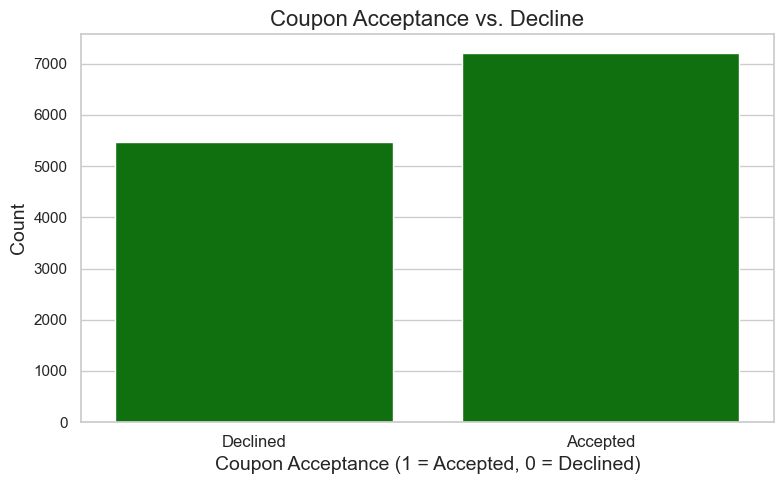

In [439]:
# 1) Overall acceptance of coupons.

# proportion of coupon acceptance
acceptance_counts = final_dataset['Y'].value_counts()

# plot
plt.figure(figsize=(8, 5))
sns.barplot(x=acceptance_counts.index, y=acceptance_counts.values, color="green")
plt.title('Coupon Acceptance vs. Decline', fontsize=16)
plt.xlabel('Coupon Acceptance (1 = Accepted, 0 = Declined)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks([0, 1], ['Declined', 'Accepted'], fontsize=12)
plt.tight_layout()
plt.show()

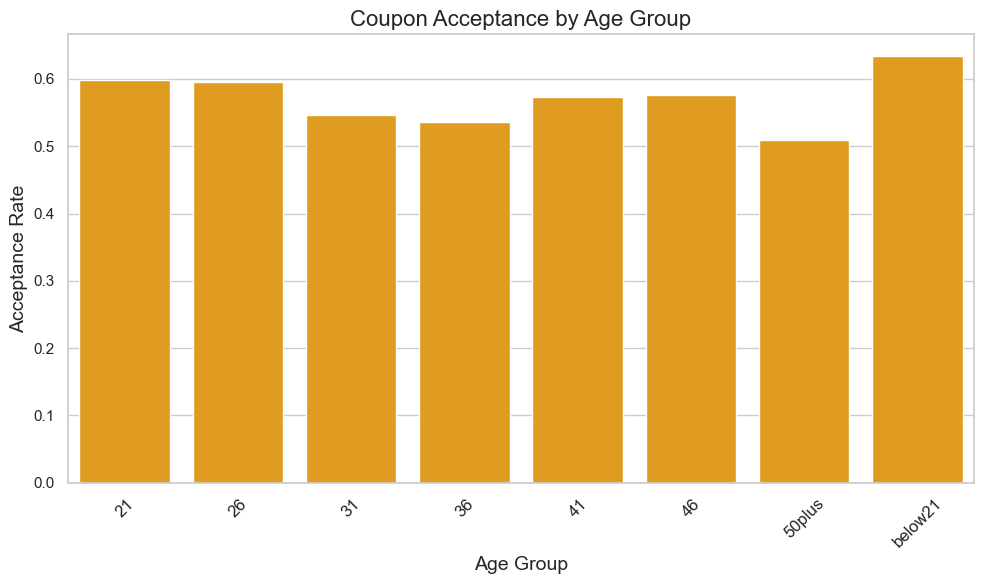

In [454]:
# 2) Comparison of acceptance rates across different age groups.

# Coupon acceptance by age group
age_acceptance = data.groupby('age')['Y'].mean()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=age_acceptance.index, y=age_acceptance.values, color="orange")
plt.title('Coupon Acceptance by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Acceptance Rate', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

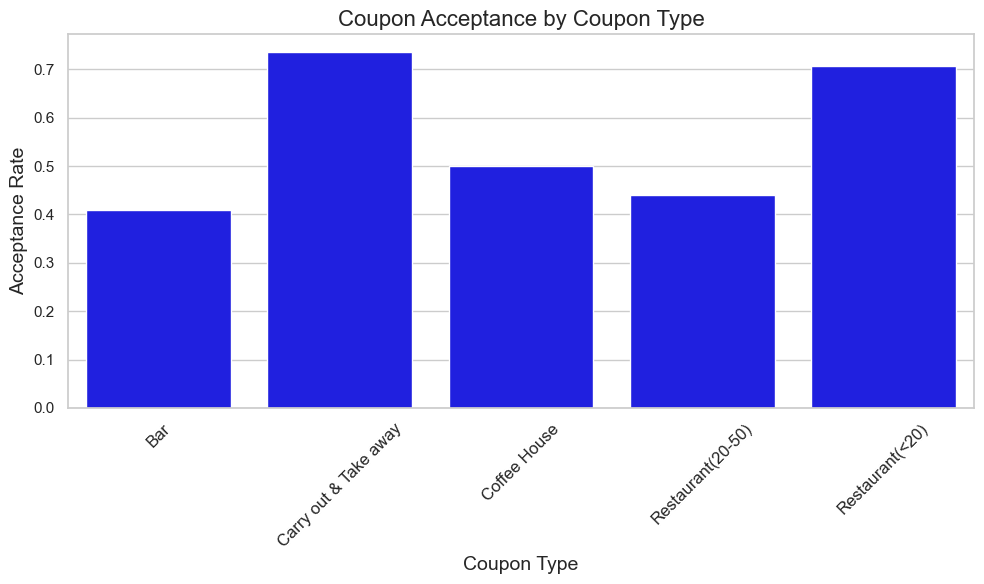

In [458]:
# 3) Comparision of acceptance rates by coupon types.

# Coupon acceptance by coupon type
coupon_acceptance = data.groupby('coupon')['Y'].mean()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=coupon_acceptance.index, y=coupon_acceptance.values, color="blue")
plt.title('Coupon Acceptance by Coupon Type', fontsize=16)
plt.xlabel('Coupon Type', fontsize=14)
plt.ylabel('Acceptance Rate', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

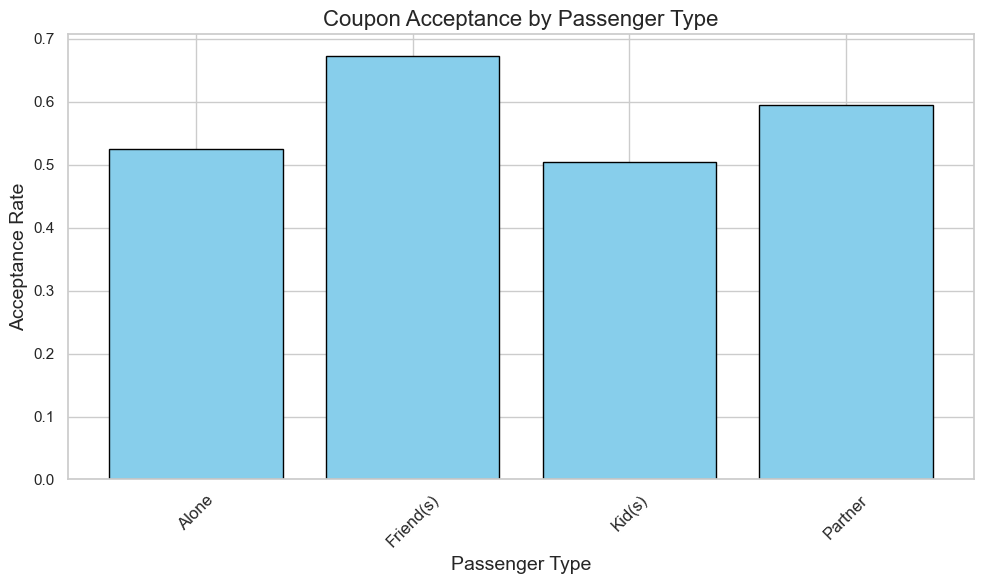

In [460]:
# 4) Comparision of acceptance rates by passanger types.

# Calculate acceptance rates by passenger type
passenger_acceptance = data.groupby('passanger')['Y'].mean()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(passenger_acceptance.index, passenger_acceptance.values, color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Coupon Acceptance by Passenger Type', fontsize=16)
plt.xlabel('Passenger Type', fontsize=14)
plt.ylabel('Acceptance Rate', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)

# Show the plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()